# Effects of Averaging Then Flattening the Data

This notebook investigates the effect of averaging packets of data and then flattening the data out. A 100 elements are collected at 100Hz so we recieve a packet of data every second or so.

In [1]:
import pandas as pd
import numpy as np
import unittest
import altair as alt

from src.data_processing import create_data_from_entry, flatten_data, time_period, unstable_seconds, row_moving_average_filter
from src.vizualization import generate_stability_rules, generate_line_chart

# Render altair charts correctly
alt.renderers.enable('notebook')

# Store the altair char json separately and not in the notebook to reduce
# notebook size
alt.data_transformers.enable('json')

%load_ext autoreload
%autoreload 2

## Load the data

First we import the calibrated data created in [Notebook 4](4-rdp-voltage-signal-analysis-post-capacitor-706.ipynb).

In [2]:
data = pd.read_csv(os.path.join(os.getcwd(), "..", "data", "processed", "post-capacitor-cleand-calibrated-voltage-data.csv"))
data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Datetime
0,92.6090,93.7440,92.6600,93.6674,92.6792,93.6930,92.6728,93.6994,92.7046,93.5974,...,92.9852,93.3678,92.9406,93.4124,92.9470,93.3870,92.9088,93.4380,92.8704,2018-11-09 10:46:08.559401
1,92.8194,93.5272,92.8130,93.5910,92.7876,93.5718,92.8068,93.5400,92.8386,93.5974,...,93.9990,92.3922,93.9798,92.3412,94.0182,92.3348,93.9926,92.4368,94.0372,2018-11-09 10:46:09.754002
2,96.3072,90.1096,96.3390,90.1096,96.2626,90.1160,96.3136,90.0842,96.3836,90.1032,...,89.8800,96.4794,89.9312,96.4602,89.9566,96.4920,89.8482,96.5048,89.9502,2018-11-09 10:46:10.942502
3,90.4284,95.9438,90.4156,95.9564,90.3838,96.0138,90.4412,95.9310,90.3902,95.9756,...,96.3136,90.0394,96.3262,90.0332,96.2816,90.0586,96.2752,90.0268,96.3136,2018-11-09 10:46:12.132639
4,95.4782,90.9130,95.4400,90.8938,95.4974,90.8366,95.5166,90.8366,95.5548,90.7918,...,90.2052,96.1414,90.1926,96.2052,90.1032,96.2242,90.1542,96.2052,90.1288,2018-11-09 10:46:13.315691


In [3]:
data.shape

(599, 101)

## Average the packets of data

Now we average the packets of data.

In [4]:
filtered_data = data.apply(row_moving_average_filter, axis=1, result_type='expand').rename(columns={0: "Datetime"})
filtered_data.head()

,Datetime,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2018-11-09 10:46:08.559401,93.1765,93.2020,93.1637,93.1733,93.1861,93.1829,93.1861,93.2020,93.1510,...,93.1670,93.1510,93.1765,93.1542,93.1765,93.1797,93.1670,93.1479,93.1734,93.1542
1,2018-11-09 10:46:09.754002,93.1733,93.1701,93.2020,93.1893,93.1797,93.1893,93.1734,93.1893,93.2180,...,93.1765,93.1829,93.1956,93.1860,93.1605,93.1797,93.1765,93.1637,93.2147,93.2370
2,2018-11-09 10:46:10.942502,93.2084,93.2243,93.2243,93.1861,93.1893,93.2148,93.1989,93.2339,93.2434,...,93.2339,93.1765,93.1797,93.2053,93.1957,93.2084,93.2243,93.1701,93.1765,93.2275
3,2018-11-09 10:46:12.132639,93.1861,93.1797,93.1860,93.1701,93.1988,93.2275,93.1861,93.1606,93.1829,...,93.1638,93.1702,93.1765,93.1828,93.1797,93.1574,93.1701,93.1669,93.1510,93.1702
4,2018-11-09 10:46:13.315691,93.1956,93.1765,93.1669,93.1956,93.1670,93.1766,93.1766,93.1957,93.1733,...,93.1893,93.1988,93.1733,93.1670,93.1989,93.1542,93.1637,93.1892,93.1797,93.1670


Lets check manually we get the results we expect.

In [5]:
for i, j in zip(range(1,100), filtered_data.index):
    assert filtered_data.iloc[j, i] == np.mean([data.iloc[j,i-1], data.iloc[j,i]])

We now flatten the data to allow us to plot the signal.

In [6]:
flattened_filtered_data = flatten_data(filtered_data)
flattened_filtered_data.head()

,Datetime,Value
0,2018-11-09 10:46:08.559401000,93.1765
1,2018-11-09 10:46:08.571347010,93.2020
2,2018-11-09 10:46:08.583293020,93.1637
3,2018-11-09 10:46:08.595239030,93.1733
4,2018-11-09 10:46:08.607185040,93.1861


In [7]:
np.mean(flattened_filtered_data["Value"])

93.177498462889787

In [8]:
np.std(flattened_filtered_data["Value"])

0.021491007906388405

So the mean value is 93.177498kV and the standard deviation is 0.02149kV, or 21.49V.

Now we plot the signal.

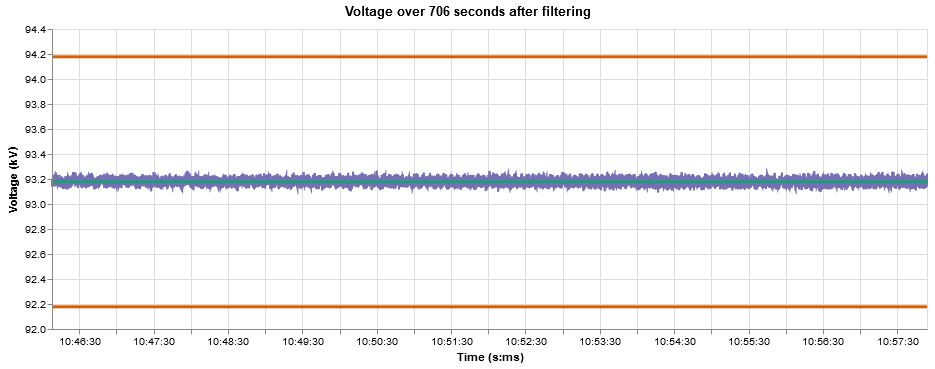

In [9]:
stability_rules = generate_stability_rules(flattened_filtered_data)
base = generate_line_chart(x_title="Time (s:ms)", y_title="Voltage (kV)",  time_unit="hoursminutesseconds", y_scale=(92,94.3))

alt.layer(base, stability_rules, data=flattened_filtered_data, 
          title="Voltage over {} seconds after filtering".format(time_period(flattened_filtered_data)), 
          config={"background": "white"},
          width = 875
         )